## Recursive Functions

A recursive function is one which calls itself somewhere inside the function.

### Example 1: Factorial

Let us write a function to compute factorial of a given input integer n $\geq$ 1.

In [1]:
def factorial_iterative(n):
    f = 1
    for i in range(0,n):
        f = f * (i+1)
    return f

In [2]:
print(factorial_iterative(5))

120


We can write the same function in the following way.

In [3]:
def factorial(n):
    if (n <= 1):
        return 1
    return n * factorial(n-1)

In [4]:
print(factorial(5))

120


As an example, the recursive calls for factorial(3) would be the following.

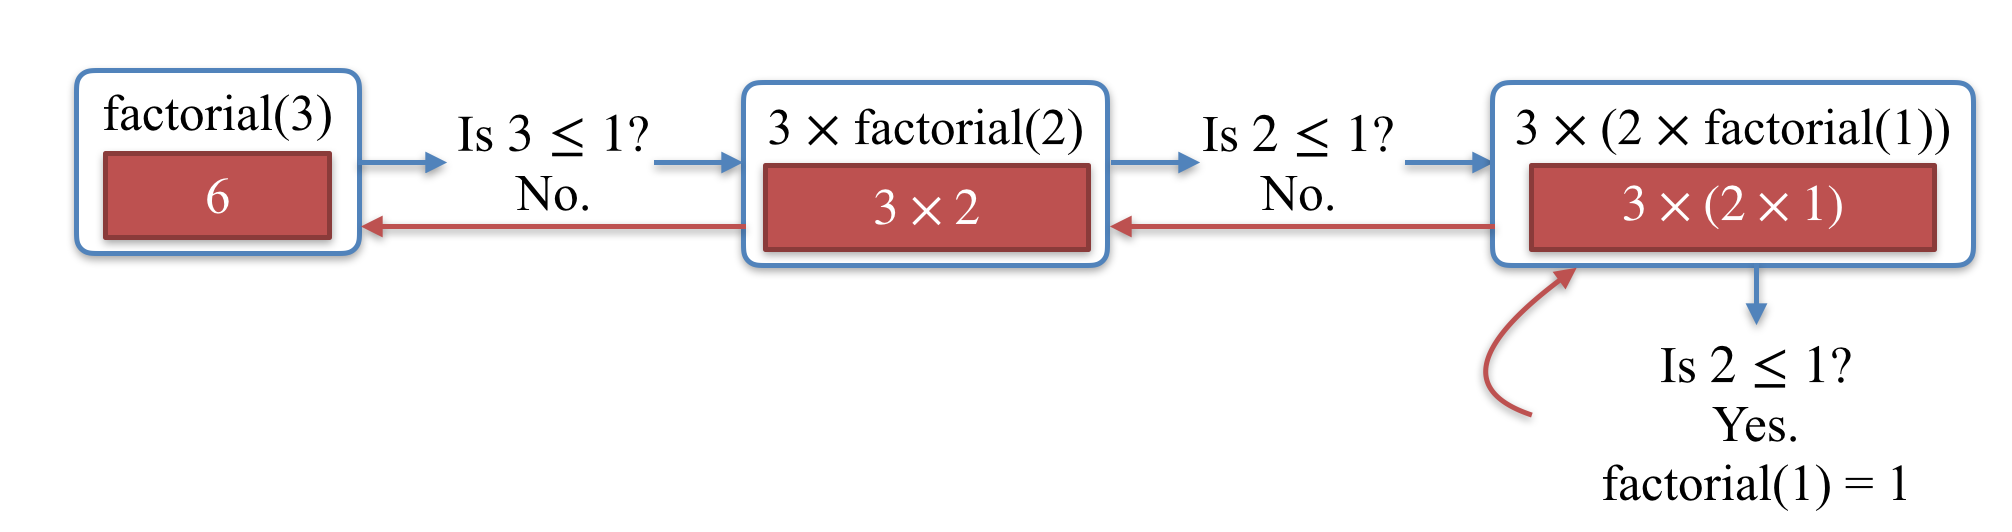

### Example 2: Binary Search using Recursion

Let us implement binary search using recursion.

In [5]:
# This function requires specifying a custom left and right pointer
def binarySearchRecursiveSteps(nums, target, left, right): 
    # Base condition: no more search space left
    if (left > right):
        return -1

    # Look at the midpoint of the search space
    mid = int((left + right)/2)
    if target == nums[mid]:
        return mid

    # If target is smaller than the value at midpoint, 
    # discard all elements in the right half including the mid element
    elif target < nums[mid]:
        return binarySearchRecursiveSteps(nums, target, left, mid - 1)

    # If target is larger than the value at midpoint, 
    # discard all elements in the right half including the mid element
    else:
        return binarySearchRecursiveSteps(nums, target, mid + 1, right)

# Recursive binary search on the whole list
def binarySearchRecursive(nums, target):
    return binarySearchRecursiveSteps(nums, target, 0, len(nums)-1)

In [6]:
nums = [1,1,2,2,2,3,4,5,6,7,8,8,8,8,9]
mytarget = 6
idx = binarySearchRecursive(nums,mytarget)
if (idx >= 0):
    print("The index of %d in the list is %d." %(mytarget,idx))
else:
    print("The number %d does not exist in the list." %mytarget)

The index of 6 in the list is 8.


### Example 3: Fibonacci Numbers

Write a function that computes the Fibonacci number $F_n$ for a given input integer n.

Recall that the Fibonacci numbers are defined as:

$F_0 = 0, F_1 = 1$, and $F_{n} = F_{n-1} + F_{n-2}$ for $n > 1$.

In [7]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

In [8]:
for i in range(0,10):
    print("F(%d) = %d." %(i, fibonacci(i)))

F(0) = 0.
F(1) = 1.
F(2) = 1.
F(3) = 2.
F(4) = 3.
F(5) = 5.
F(6) = 8.
F(7) = 13.
F(8) = 21.
F(9) = 34.


### Iterative version of Fibonacci function

Let us also implement Fibonacci without using recursion. 

In [9]:
def fibonacci_iterative(n):
    a = 0
    b = 1
    for i in range(n):
        a, b = b, a+b
        # The above is different from assigning 
        # a = b and b = a + b separately
    return a

In [10]:
for i in range(0,10):
    print("F(%d) = %d." %(i, fibonacci_iterative(i)))

F(0) = 0.
F(1) = 1.
F(2) = 1.
F(3) = 2.
F(4) = 3.
F(5) = 5.
F(6) = 8.
F(7) = 13.
F(8) = 21.
F(9) = 34.


### Performance

Let us measure the running times of the two versions.

Average time for F(0) recursive = 0.000381 ms.
Average time for F(0) iterative = 0.000572 ms.
Average time for F(5) recursive = 0.003672 ms.
Average time for F(5) iterative = 0.002050 ms.
Average time for F(10) recursive = 0.062037 ms.
Average time for F(10) iterative = 0.003386 ms.


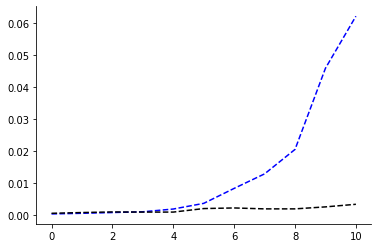

In [15]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np

iterations = 5
max_n = 10

rtime = []
itime = []

for n in range(max_n+1):
    rtotal = 0
    itotal = 0
    for i in range(iterations):
        # Measure time for recursive version
        start = time.time()
        fn = fibonacci(n)
        end = time.time()
        rtotal = rtotal + end - start
    
        # Measure time for iterative version
        start = time.time()
        fn = fibonacci_iterative(n)
        end = time.time()
        itotal = itotal + end - start
        
    # Impute the average running times in ms for this n
    rtime.append(rtotal*1000/iterations)
    itime.append(itotal*1000/iterations)
    
    if n % 5 == 0:
        print("Average time for F(%d) recursive = %f ms." %(n, rtime[n]))
        print("Average time for F(%d) iterative = %f ms." %(n, itime[n]))
        
# Let's also plot
t1 = np.arange(0.0, max_n+1, 1)

ax = plt.subplot(111)
ax.plot(t1, rtime, 'b--')
ax.plot(t1, itime, 'k--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Possible solution

Implement a cache to store results for instances already computed.

In this case, we can store F(2), F(3), ... in a dictionary or array and reuse. 

In [16]:
def fibonacci_cached(n):
    cache = {0:0, 1:1}
    return fibonacciUsingCache(n, cache)

def fibonacciUsingCache(n, cache):
    if not n in cache:
        cache[n] = fibonacciUsingCache(n-1, cache) + fibonacciUsingCache(n-2, cache)
    return cache[n]

In [17]:
for i in range(0,10):
    print("F(%d) = %d." %(i, fibonacci_cached(i)))

F(0) = 0.
F(1) = 1.
F(2) = 1.
F(3) = 2.
F(4) = 3.
F(5) = 5.
F(6) = 8.
F(7) = 13.
F(8) = 21.
F(9) = 34.


Now let us test the performance again.

Average time for F(0) recursive = 0.000381 ms.
Average time for F(0) iterative = 0.000811 ms.
Average time for F(0) cached = 0.001001 ms.
Average time for F(5) recursive = 0.002289 ms.
Average time for F(5) iterative = 0.001001 ms.
Average time for F(5) cached = 0.002193 ms.
Average time for F(10) recursive = 0.029087 ms.
Average time for F(10) iterative = 0.001335 ms.
Average time for F(10) cached = 0.007820 ms.


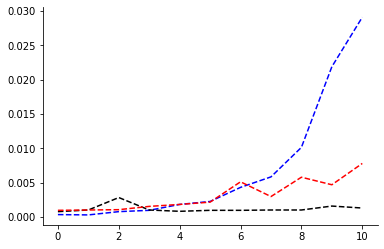

In [18]:
import time
import matplotlib.pyplot as plt
import numpy as np

iterations = 5
max_n = 10

rtime = []
itime = []
ctime = []

for n in range(max_n+1):
    rtotal = 0
    itotal = 0
    ctotal = 0
    for i in range(iterations):
        # Measure time for recursive version
        start = time.time()
        fn = fibonacci(n)
        end = time.time()
        rtotal = rtotal + end - start
    
        # Measure time for iterative version
        start = time.time()
        fn = fibonacci_iterative(n)
        end = time.time()
        itotal = itotal + end - start
        
        # Measure time for iterative version
        start = time.time()
        fn = fibonacci_cached(n)
        end = time.time()
        ctotal = ctotal + end - start
        
    # Impute the average running times in ms for this n
    rtime.append(rtotal*1000/iterations)
    itime.append(itotal*1000/iterations)
    ctime.append(ctotal*1000/iterations)
    
    if n % 5 == 0:
        print("Average time for F(%d) recursive = %f ms." %(n, rtime[n]))
        print("Average time for F(%d) iterative = %f ms." %(n, itime[n]))
        print("Average time for F(%d) cached = %f ms." %(n, ctime[n]))
        
# Let's also plot
t1 = np.arange(0.0, max_n+1, 1)

ax = plt.subplot(111)
ax.plot(t1, rtime, 'b--')
ax.plot(t1, itime, 'k--')
ax.plot(t1, ctime, 'r--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()